In [113]:
# Required library imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings(action='once')
pd.options.mode.chained_assignment = None


Importing dataset and understanding the dataset

In [114]:
raw_df = pd.read_csv("dataset.csv")
raw_df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q16,Q17,Q14,Q6,Q10,Q10_4_TEXT,Q11,Q12.1,nationality,Q22
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,I can do an excellent job on Luddy course-rela...,I can learn the content taught my Luddy courses,I can earn a good grade in the Luddy courses t...,For what course are you being asked to fill ou...,How do you describe yourself? - Selected Choice,How do you describe yourself? - Prefer to self...,Choose one or more races that you consider you...,"Are you of Spanish, Hispanic, or Latino origin?",Are you a domestic or international student?,Here is your completion code for this survey. ...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID17""}","{""ImportId"":""QID18""}","{""ImportId"":""QID15""}","{""ImportId"":""QID7_TEXT""}","{""ImportId"":""QID10""}","{""ImportId"":""QID10_4_TEXT""}","{""ImportId"":""QID11""}","{""ImportId"":""QID12""}","{""ImportId"":""QID24""}","{""ImportId"":""QID23_TEXT""}"
2,2022-08-20 17:59:51,2022-08-20 18:00:09,IP Address,73.102.129.218,100,18,True,2022-08-20 18:00:10,R_bKndddVbYvd0OWZ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-08-23 13:52:36,2022-08-23 13:53:01,Survey Preview,NaN,100,25,True,2022-08-23 13:53:03,R_1r2qkSsjr1bFVj4,NaN,...,NaN,NaN,NaN,i222,Non-binary / third gender,NaN,White or Caucasian,No,NaN,NaN
4,2022-08-23 14:02:49,2022-08-23 14:03:33,Survey Preview,NaN,100,43,True,2022-08-23 14:03:34,R_VWh5xFzPTtclQkx,NaN,...,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236,2022-09-19 19:13:43,2022-09-19 19:16:08,IP Address,129.79.197.142,100,145,True,2022-09-19 19:16:09,R_272vKAcbNo8CzBW,NaN,...,Yes,Yes,Yes,Applied Algorithm,Male,NaN,Asian,No,NaN,NaN
237,2022-09-19 20:05:11,2022-09-19 20:10:01,IP Address,68.50.18.208,100,289,True,2022-09-19 20:10:01,R_3R91C3fW7xdpcsb,NaN,...,No,Yes,Yes,Applied Algorithms,Male,NaN,Asian,No,NaN,Q2LUD2F-5693
238,2022-09-19 21:00:05,2022-09-19 21:03:57,IP Address,73.102.55.174,100,232,True,2022-09-19 21:03:57,R_21uLKGk2ALgjY9u,NaN,...,No,Yes,Yes,Applied Algorithms,Male,NaN,Asian,No,NaN,Q2LUD2F-1877
239,2022-09-19 21:14:37,2022-09-19 21:17:33,IP Address,66.244.80.109,100,176,True,2022-09-19 21:17:33,R_2AHDmGsQ9DkUsPy,NaN,...,Yes,Yes,Yes,B505,Male,NaN,Asian,No,NaN,NaN


In [115]:
raw_df.describe()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q16,Q17,Q14,Q6,Q10,Q10_4_TEXT,Q11,Q12.1,nationality,Q22
count,241,241,241,237,241,241,241,241,241,2,...,226,226,226,224,224,2,224,224,2,84
unique,240,241,4,206,9,164,4,240,241,2,...,4,4,4,123,6,2,10,4,2,84
top,2022-09-19 14:34:46,End Date,IP Address,73.102.129.218,100,128,True,2022-09-19 14:40:52,Response ID,Recipient Last Name,...,Yes,Yes,Yes,Applied Algorithms,Male,How do you describe yourself? - Prefer to self...,White or Caucasian,No,Are you a domestic or international student?,Here is your completion code for this survey. ...
freq,2,1,235,4,222,4,222,2,1,1,...,211,221,216,21,155,1,117,211,1,1


In [116]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 241 entries, 0 to 240
Data columns (total 50 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   StartDate               241 non-null    object
 1   EndDate                 241 non-null    object
 2   Status                  241 non-null    object
 3   IPAddress               237 non-null    object
 4   Progress                241 non-null    object
 5   Duration (in seconds)   241 non-null    object
 6   Finished                241 non-null    object
 7   RecordedDate            241 non-null    object
 8   ResponseId              241 non-null    object
 9   RecipientLastName       2 non-null      object
 10  RecipientFirstName      2 non-null      object
 11  RecipientEmail          2 non-null      object
 12  ExternalReference       2 non-null      object
 13  LocationLatitude        224 non-null    object
 14  LocationLongitude       224 non-null    object
 15  Distri

In [117]:
raw_df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Luddy or not?',
       'other_department ', 'luddy_department ', 'sense of belonging _1',
       'sense of belonging _2', 'sense of belonging _3',
       'sense of belonging _4', 'sense of belonging _5',
       'sense of belonging _6', 'sense of belonging _7',
       'sense of belonging _8', 'sense of belonging _9',
       'sense of belonging _10', 'sense of belonging _11',
       'sense of belonging _12', 'sense of belonging _13',
       'sense of belonging _14', 'sense of belonging _15',
       'sense of belonging _16', 'Q19', 'Q12', 'Q13', 'Q15', 'Q16', 'Q17',
       'Q14', 'Q6', 'Q10', 'Q10_4_TEXT', 'Q11', 'Q12.1', 'nationality', 'Q22'],
      dtype='object')

In [118]:
raw_df.head()

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,Q16,Q17,Q14,Q6,Q10,Q10_4_TEXT,Q11,Q12.1,nationality,Q22
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,I can do an excellent job on Luddy course-rela...,I can learn the content taught my Luddy courses,I can earn a good grade in the Luddy courses t...,For what course are you being asked to fill ou...,How do you describe yourself? - Selected Choice,How do you describe yourself? - Prefer to self...,Choose one or more races that you consider you...,"Are you of Spanish, Hispanic, or Latino origin?",Are you a domestic or international student?,Here is your completion code for this survey. ...
1,"{""ImportId"":""startDate"",""timeZone"":""America/De...","{""ImportId"":""endDate"",""timeZone"":""America/Denv...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""QID17""}","{""ImportId"":""QID18""}","{""ImportId"":""QID15""}","{""ImportId"":""QID7_TEXT""}","{""ImportId"":""QID10""}","{""ImportId"":""QID10_4_TEXT""}","{""ImportId"":""QID11""}","{""ImportId"":""QID12""}","{""ImportId"":""QID24""}","{""ImportId"":""QID23_TEXT""}"
2,2022-08-20 17:59:51,2022-08-20 18:00:09,IP Address,73.102.129.218,100,18,True,2022-08-20 18:00:10,R_bKndddVbYvd0OWZ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2022-08-23 13:52:36,2022-08-23 13:53:01,Survey Preview,NaN,100,25,True,2022-08-23 13:53:03,R_1r2qkSsjr1bFVj4,NaN,...,NaN,NaN,NaN,i222,Non-binary / third gender,NaN,White or Caucasian,No,NaN,NaN
4,2022-08-23 14:02:49,2022-08-23 14:03:33,Survey Preview,NaN,100,43,True,2022-08-23 14:03:34,R_VWh5xFzPTtclQkx,NaN,...,Yes,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As it can be seen above, the 1st row provides additional context about the column.
In order to clean the data, we can embed that information in the column name.

In [119]:
raw_df['luddy_department '].value_counts()

Informatics                                                        70
Data Science                                                       66
Computer Science                                                   44
Intelligent Systems Engineering                                     3
Other                                                               2
If you are Luddy student, what is your home department/program?     1
{"ImportId":"QID6"}                                                 1
Name: luddy_department , dtype: int64

In [120]:
raw_df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Luddy or not?',
       'other_department ', 'luddy_department ', 'sense of belonging _1',
       'sense of belonging _2', 'sense of belonging _3',
       'sense of belonging _4', 'sense of belonging _5',
       'sense of belonging _6', 'sense of belonging _7',
       'sense of belonging _8', 'sense of belonging _9',
       'sense of belonging _10', 'sense of belonging _11',
       'sense of belonging _12', 'sense of belonging _13',
       'sense of belonging _14', 'sense of belonging _15',
       'sense of belonging _16', 'Q19', 'Q12', 'Q13', 'Q15', 'Q16', 'Q17',
       'Q14', 'Q6', 'Q10', 'Q10_4_TEXT', 'Q11', 'Q12.1', 'nationality', 'Q22'],
      dtype='object')

Standardizing the columns

In [121]:
old_to_new_cols = {}

old_to_new_cols = {**{raw_df.columns[i] : f"SB_{raw_df.columns[i].split('_')[-1]}_{raw_df.iloc[0,i].split('- ')[-1]}" for i in range(20,36)}}
old_to_new_cols = {**old_to_new_cols, **{raw_df.columns[j]: f"{raw_df.columns[j]}_{raw_df.iloc[0,j]}" for j in [*[i for i in range(36,45)], 46]}}

old_to_new_cols['Q10_4_TEXT'] = f"Q10_{raw_df.iloc[0, 45].split(' -')[0]}"
old_to_new_cols['Q12.1'] = f"Q12_1_{raw_df.iloc[0, 47].split(' -')[0]}"
old_to_new_cols['luddy_department '] = 'luddy_department'
old_to_new_cols['other_department '] = 'other_department'

raw_df.rename(columns=old_to_new_cols, inplace=True)

In [122]:
raw_df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'RecipientLastName', 'RecipientFirstName', 'RecipientEmail',
       'ExternalReference', 'LocationLatitude', 'LocationLongitude',
       'DistributionChannel', 'UserLanguage', 'Luddy or not?',
       'other_department', 'luddy_department',
       'SB_1_People in the Luddy School notice when I am good at something',
       'SB_2_Faculty and staff in the Luddy School value my opinions',
       'SB_3_Other students in the Luddy School take my opinions seriously',
       'SB_4_Most faculty and staff in the Luddy School are interested in me.',
       'SB_5_There is at least one instructor or other faculty or staff member in the the Luddy School I can talk to if I have a problem.',
       'SB_6_People in the Luddy School are friendly to me.',
       'SB_7_Students in the Luddy School help each other to succeed.',
       'SB_8_I am treated with as 

These rows provide additional metadata for the columns. Since we have embedded the information from them into the column name, we can go ahead and remove them from the dataframe.

In [123]:
raw_df = raw_df.iloc[2:,:]

Better. Let's find out how many null values are present in this dataset. Identify the columns with large number of null values and remove them from the dataframe.
`Note`: Ignoring the first two columns 

In [124]:
print(f"Percentage of Null or Nonetypes in each columns : \n{100 * raw_df.isna().mean()}")

Percentage of Null or Nonetypes in each columns : 
StartDate                                                                                                                              0.000000
EndDate                                                                                                                                0.000000
Status                                                                                                                                 0.000000
IPAddress                                                                                                                              1.673640
Progress                                                                                                                               0.000000
Duration (in seconds)                                                                                                                  0.000000
Finished                                                                             

In [125]:
columns_most_people_dont_answer = {col : 100*raw_df[col].isna().mean() for i,col in enumerate(raw_df.columns) if 100*raw_df[col].isna().mean() > 90.}

In [126]:
columns_most_people_dont_answer

{'RecipientLastName': 100.0,
 'RecipientFirstName': 100.0,
 'RecipientEmail': 100.0,
 'ExternalReference': 100.0,
 'Q10_How do you describe yourself?': 100.0,
 'nationality': 100.0}

- As it can be seen here, people have not answered descriptive question like `How do you describe yourself?`. 
- Surprisingly the nationality column has been left unanswered by everyone. 
- Other empty columns are present in this dictionary as well. 

Let's go ahead and remove these columns.

In [127]:
raw_df.drop(list(columns_most_people_dont_answer.keys()), axis=1, inplace=True)

In [128]:
raw_df.reset_index(inplace=True)
raw_df.drop('index', axis=1, inplace=True)

In [129]:
raw_df

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,LocationLatitude,...,Q13_I could master the content of even the most challenging Luddy courses if I try,Q15_I can do a good job on all of my Luddy courses if I do not give up,Q16_I can do an excellent job on Luddy course-related problems and tasks assigned this semester,Q17_I can learn the content taught my Luddy courses,Q14_I can earn a good grade in the Luddy courses that I am taking this semester,Q6_For what course are you being asked to fill out this survey?,Q10_How do you describe yourself? - Selected Choice,Q11_Choose one or more races that you consider yourself to be,"Q12_1_Are you of Spanish, Hispanic, or Latino origin?",Q22
0,2022-08-20 17:59:51,2022-08-20 18:00:09,IP Address,73.102.129.218,100,18,True,2022-08-20 18:00:10,R_bKndddVbYvd0OWZ,39.1397,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022-08-23 13:52:36,2022-08-23 13:53:01,Survey Preview,NaN,100,25,True,2022-08-23 13:53:03,R_1r2qkSsjr1bFVj4,41.8874,...,NaN,NaN,NaN,NaN,NaN,i222,Non-binary / third gender,White or Caucasian,No,NaN
2,2022-08-23 14:02:49,2022-08-23 14:03:33,Survey Preview,NaN,100,43,True,2022-08-23 14:03:34,R_VWh5xFzPTtclQkx,41.8874,...,No,No,Yes,No,No,NaN,NaN,NaN,NaN,NaN
3,2022-08-20 18:04:58,2022-08-23 15:15:53,IP Address,73.102.129.218,100,249054,True,2022-08-23 15:15:53,R_CmLRf9pq0acjmGl,39.1963,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2022-08-17 09:42:06,2022-08-17 14:07:08,IP Address,156.56.95.98,50,15901,False,2022-08-24 14:07:09,R_2S20nXLtLfB2Yyc,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,2022-09-19 19:13:43,2022-09-19 19:16:08,IP Address,129.79.197.142,100,145,True,2022-09-19 19:16:09,R_272vKAcbNo8CzBW,39.1707,...,Yes,Yes,Yes,Yes,Yes,Applied Algorithm,Male,Asian,No,NaN
235,2022-09-19 20:05:11,2022-09-19 20:10:01,IP Address,68.50.18.208,100,289,True,2022-09-19 20:10:01,R_3R91C3fW7xdpcsb,39.1215,...,No,Yes,No,Yes,Yes,Applied Algorithms,Male,Asian,No,Q2LUD2F-5693
236,2022-09-19 21:00:05,2022-09-19 21:03:57,IP Address,73.102.55.174,100,232,True,2022-09-19 21:03:57,R_21uLKGk2ALgjY9u,39.1397,...,Yes,Yes,No,Yes,Yes,Applied Algorithms,Male,Asian,No,Q2LUD2F-1877
237,2022-09-19 21:14:37,2022-09-19 21:17:33,IP Address,66.244.80.109,100,176,True,2022-09-19 21:17:33,R_2AHDmGsQ9DkUsPy,39.1397,...,Yes,Yes,Yes,Yes,Yes,B505,Male,Asian,No,NaN


In [130]:
raw_df[["Luddy or not?","other_department", "luddy_department"]]

,Luddy or not?,other_department,luddy_department
0,NaN,NaN,NaN
1,"Yes, I am a student in the Luddy School",NaN,Computer Science
2,"No, I am a student in another school/department",philosophy,NaN
3,NaN,NaN,NaN
4,NaN,NaN,Intelligent Systems Engineering
...,...,...,...
234,"Yes, I am a student in the Luddy School",NaN,Data Science
235,"Yes, I am a student in the Luddy School",NaN,Computer Science
236,"Yes, I am a student in the Luddy School",NaN,Data Science
237,"No, I am a student in another school/department",Math,NaN


In [131]:
raw_df["Luddy or not?"].value_counts()

Yes, I am a student in the Luddy School            186
No, I am a student in another school/department     46
Name: Luddy or not?, dtype: int64

In [132]:
raw_df[raw_df["Luddy or not?"] == 'Yes, I am a student in the Luddy School']["luddy_department"].value_counts()

Informatics                        70
Data Science                       66
Computer Science                   44
Intelligent Systems Engineering     2
Other                               2
Name: luddy_department, dtype: int64

Here, it can be seen that the form had a text field in this question, which can lead to different answers. 

In [133]:
raw_df[raw_df["Luddy or not?"] == 'No, I am a student in another school/department']["other_department"].value_counts()

Kelley School of Business           7
Kelley                              7
Kelley School of Business           3
sdfsdf                              2
University Division                 2
Math                                2
philosophy                          1
University Division                 1
School of Education                 1
I am in Luddy                       1
Political Science                   1
The College of Arts and Sciences    1
Kelley                              1
Kelley school of business           1
International Studies               1
KELLEY SCHOOL OF BUSINESS           1
arts and sciences                   1
university division                 1
Kelley School Of Business           1
Geology                             1
The Media School                    1
college of arts and sciences        1
School of Public Health             1
School of Public Health             1
Jacobs School of Music              1
College of Arts and Sciences        1
test        

In [134]:
raw_df['other_department'].value_counts()

Kelley School of Business           7
Kelley                              7
Kelley School of Business           3
sdfsdf                              2
University Division                 2
Math                                2
philosophy                          1
University Division                 1
School of Education                 1
I am in Luddy                       1
Political Science                   1
The College of Arts and Sciences    1
Kelley                              1
Kelley school of business           1
International Studies               1
KELLEY SCHOOL OF BUSINESS           1
arts and sciences                   1
university division                 1
Kelley School Of Business           1
Geology                             1
The Media School                    1
college of arts and sciences        1
School of Public Health             1
School of Public Health             1
Jacobs School of Music              1
College of Arts and Sciences        1
test        

In [135]:
raw_df['other_department'].replace(to_replace=['Kelley School of Business', 'Kelley', 'Kelley School of Business ', 'Kelley School Of Business', 'KELLEY SCHOOL OF BUSINESS', 'Kelley school of business', 'Kelley ', ], value='Kelley School of Business', inplace=True)
raw_df['other_department'].replace(to_replace=['University Division', 'University Division ', 'university division'], value='University Division', inplace=True)
raw_df['other_department'].replace(to_replace=['College of Arts and Sciences', 'college of arts and sciences', 'arts and sciences', 'The College of Arts and Sciences'], value='College of Arts and Sciences', inplace=True)
raw_df['other_department'].replace(to_replace=['School of Public Health', 'School of Public Health '], value='School of Public Health', inplace=True)
raw_df['other_department'].replace(to_replace=['O\'neill', 'Political Science'], value='O\'Neill School of Public and Environmental Affairs', inplace=True)
raw_df['other_department'].replace(to_replace=['sdfsdf', 'test'], value='Others', inplace=True)


In [136]:
raw_df['other_department'].value_counts()

Kelley School of Business                             21
College of Arts and Sciences                           4
University Division                                    4
Others                                                 3
School of Public Health                                2
Math                                                   2
O'Neill School of Public and Environmental Affairs     2
philosophy                                             1
Geology                                                1
Jacobs School of Music                                 1
The Media School                                       1
International Studies                                  1
I am in Luddy                                          1
School of Education                                    1
Name: other_department, dtype: int64

In [137]:
raw_df.columns

Index(['StartDate', 'EndDate', 'Status', 'IPAddress', 'Progress',
       'Duration (in seconds)', 'Finished', 'RecordedDate', 'ResponseId',
       'LocationLatitude', 'LocationLongitude', 'DistributionChannel',
       'UserLanguage', 'Luddy or not?', 'other_department', 'luddy_department',
       'SB_1_People in the Luddy School notice when I am good at something',
       'SB_2_Faculty and staff in the Luddy School value my opinions',
       'SB_3_Other students in the Luddy School take my opinions seriously',
       'SB_4_Most faculty and staff in the Luddy School are interested in me.',
       'SB_5_There is at least one instructor or other faculty or staff member in the the Luddy School I can talk to if I have a problem.',
       'SB_6_People in the Luddy School are friendly to me.',
       'SB_7_Students in the Luddy School help each other to succeed.',
       'SB_8_I am treated with as much respect as other students.',
       'SB_9_I have a good relationship with other students in

In [138]:
pd.to_datetime(raw_df['StartDate']).dt.date

0      2022-08-20
1      2022-08-23
2      2022-08-23
3      2022-08-20
4      2022-08-17
          ...    
234    2022-09-19
235    2022-09-19
236    2022-09-19
237    2022-09-19
238    2022-09-19
Name: StartDate, Length: 239, dtype: object

In [139]:
pd.to_datetime(raw_df['EndDate'])

0     2022-08-20 18:00:09
1     2022-08-23 13:53:01
2     2022-08-23 14:03:33
3     2022-08-23 15:15:53
4     2022-08-17 14:07:08
              ...        
234   2022-09-19 19:16:08
235   2022-09-19 20:10:01
236   2022-09-19 21:03:57
237   2022-09-19 21:17:33
238   2022-09-19 21:30:34
Name: EndDate, Length: 239, dtype: datetime64[ns]

We can derive the time to fill this survey from the start and end datetime. We already have the column Duration which gives us this information. So we can go ahead and just drop the `StartDate` and `EndDate` columns from the dataframe.

In [140]:
(pd.to_datetime(raw_df['EndDate'])- pd.to_datetime(raw_df['StartDate'])).dt.seconds

0         18
1         25
2         44
3      76255
4      15902
       ...  
234      145
235      290
236      232
237      176
238      400
Length: 239, dtype: int64

In [141]:
raw_df.drop(['StartDate', 'EndDate'], axis=1, inplace=True)

In [142]:
raw_df

,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,LocationLatitude,LocationLongitude,DistributionChannel,...,Q13_I could master the content of even the most challenging Luddy courses if I try,Q15_I can do a good job on all of my Luddy courses if I do not give up,Q16_I can do an excellent job on Luddy course-related problems and tasks assigned this semester,Q17_I can learn the content taught my Luddy courses,Q14_I can earn a good grade in the Luddy courses that I am taking this semester,Q6_For what course are you being asked to fill out this survey?,Q10_How do you describe yourself? - Selected Choice,Q11_Choose one or more races that you consider yourself to be,"Q12_1_Are you of Spanish, Hispanic, or Latino origin?",Q22
0,IP Address,73.102.129.218,100,18,True,2022-08-20 18:00:10,R_bKndddVbYvd0OWZ,39.1397,-86.5141,anonymous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Survey Preview,NaN,100,25,True,2022-08-23 13:53:03,R_1r2qkSsjr1bFVj4,41.8874,-87.6318,preview,...,NaN,NaN,NaN,NaN,NaN,i222,Non-binary / third gender,White or Caucasian,No,NaN
2,Survey Preview,NaN,100,43,True,2022-08-23 14:03:34,R_VWh5xFzPTtclQkx,41.8874,-87.6318,preview,...,No,No,Yes,No,No,NaN,NaN,NaN,NaN,NaN
3,IP Address,73.102.129.218,100,249054,True,2022-08-23 15:15:53,R_CmLRf9pq0acjmGl,39.1963,-86.5776,anonymous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IP Address,156.56.95.98,50,15901,False,2022-08-24 14:07:09,R_2S20nXLtLfB2Yyc,NaN,NaN,anonymous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,IP Address,129.79.197.142,100,145,True,2022-09-19 19:16:09,R_272vKAcbNo8CzBW,39.1707,-86.519,anonymous,...,Yes,Yes,Yes,Yes,Yes,Applied Algorithm,Male,Asian,No,NaN
235,IP Address,68.50.18.208,100,289,True,2022-09-19 20:10:01,R_3R91C3fW7xdpcsb,39.1215,-86.5784,anonymous,...,No,Yes,No,Yes,Yes,Applied Algorithms,Male,Asian,No,Q2LUD2F-5693
236,IP Address,73.102.55.174,100,232,True,2022-09-19 21:03:57,R_21uLKGk2ALgjY9u,39.1397,-86.5141,anonymous,...,Yes,Yes,No,Yes,Yes,Applied Algorithms,Male,Asian,No,Q2LUD2F-1877
237,IP Address,66.244.80.109,100,176,True,2022-09-19 21:17:33,R_2AHDmGsQ9DkUsPy,39.1397,-86.5141,anonymous,...,Yes,Yes,Yes,Yes,Yes,B505,Male,Asian,No,NaN


In [143]:
raw_df['Finished'].value_counts()

True     222
False     17
Name: Finished, dtype: int64

In [144]:
raw_df[(raw_df['Finished'] == 'False') & (raw_df['Progress'] >= '70')]

,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,LocationLatitude,LocationLongitude,DistributionChannel,...,Q13_I could master the content of even the most challenging Luddy courses if I try,Q15_I can do a good job on all of my Luddy courses if I do not give up,Q16_I can do an excellent job on Luddy course-related problems and tasks assigned this semester,Q17_I can learn the content taught my Luddy courses,Q14_I can earn a good grade in the Luddy courses that I am taking this semester,Q6_For what course are you being asked to fill out this survey?,Q10_How do you describe yourself? - Selected Choice,Q11_Choose one or more races that you consider yourself to be,"Q12_1_Are you of Spanish, Hispanic, or Latino origin?",Q22
118,IP Address,107.77.208.183,94,184,False,2022-09-14 07:12:39,R_0cXAtgcztOrxTqN,NaN,NaN,anonymous,...,Yes,Yes,Yes,Yes,Yes,INFO I453,Male,White or Caucasian,No,NaN
119,IP Address,129.79.197.185,76,149,False,2022-09-14 08:18:01,R_sUzwuAAguMRvvSp,NaN,NaN,anonymous,...,Yes,Yes,Yes,Yes,Yes,Information Society,NaN,NaN,NaN,NaN
121,IP Address,73.146.18.157,94,92,False,2022-09-14 08:35:17,R_2COFOtDDzw7OUeC,NaN,NaN,anonymous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,IP Address,129.79.197.229,94,216,False,2022-09-14 11:39:17,R_2tLo0J4yUHATuDS,NaN,NaN,anonymous,...,Yes,Yes,Yes,Yes,Yes,Information Society INFO-I 222,Male,White or Caucasian,No,NaN
132,IP Address,129.79.197.206,94,1096,False,2022-09-14 13:56:32,R_bK0h7rDM3Gfh5PH,NaN,NaN,anonymous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
133,IP Address,129.79.197.206,94,2539,False,2022-09-14 14:01:45,R_3mgZo6WLzAtDcxJ,NaN,NaN,anonymous,...,Yes,Yes,Yes,Yes,Yes,NaN,Male,Asian,No,NaN
145,IP Address,73.102.129.218,76,348520,False,2022-09-16 10:08:16,R_1QgRCWzEvYhl69o,NaN,NaN,anonymous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
150,IP Address,47.227.88.6,94,56861,False,2022-09-17 06:43:54,R_1mIBFqs0mv0E2a0,NaN,NaN,anonymous,...,Yes,Yes,Yes,Yes,Yes,The Information Society,Male,White or Caucasian,No,NaN
161,IP Address,68.50.12.222,94,770,False,2022-09-18 10:25:40,R_1eUAv8u9U1r5q40,NaN,NaN,anonymous,...,No,Yes,No,Yes,Yes,CSCI-P 556,Non-binary / third gender,Prefer not to say,No,NaN
165,IP Address,129.79.197.51,76,2962,False,2022-09-18 13:22:01,R_1OiNsFLJ9uUDIhx,NaN,NaN,anonymous,...,Yes,Yes,Yes,Yes,Yes,Information Society,NaN,NaN,NaN,NaN


In [145]:
raw_df['Q6_For what course are you being asked to fill out this survey?'].unique()

array([nan, 'i222', 'test survey', 'i453', 'Info-453',
       'Informatics Ethics - I453',
       'INFO I453 Computer and Information Ethics', 'Info I-453',
       'computer and information ethics', 'The Information Society: i222',
       'Info 222', 'I222 The Information Society', 'I222', 'INFO 222',
       'I-222', 'Information Society ', 'The Information Society',
       'The Information Society I-222', 'I-222, The information Society',
       'INFO-I 222', 'INFO-I222', 'Info I222', 'Information Society',
       'Xuhong Zhang', 'Information society', 'The Information Society ',
       'I222 Information Society ', 'Computing and Environment',
       'INFO 1222', 'FA22-BL-INFO-I222-12858: The Information Society',
       'Info-222', 'I-222, The Information Society',
       'The Information Society [INFO-I-222]',
       'I222: The Information Society', 'I222 information society ',
       'Applied Machine Learning', 'info I-222',
       'The information society', 'The information societ

The values in this column are diverse as it is a text field, but all these values belong to these few subjects.

- THE INFORMATION SOCIETY | INFO-I 222
- APPLIED ALGORITHMS | CSCI-B 505
- DATA FLUENCY | INFO-I 123
- COMPUTER AND INFORMATION ETHICS | INFO-I 453
- APPLIED MACHINE LEARNING | CSCI-P 556
- CREATIVITY, INNOVATION, & TECHNOLOGY | INFO-I 400  (School of Public Health)

Replacing with accurate values.

In [146]:
course_replace_dict = {
    'APPLIED ALGORITHMS | CSCI-B 505' : [
        'Applied Algorithms',
        'CSCI-B505 Applied Algorithms',
        'Applied Algorithm',
        'Applied algorithms',
        'CSCI-B505',
        'B505',
        'CSCI-B 505 Applied Algorithms Online',
        'CSCI-B505 Applied Algorithms (Online)','Applied algorithm',
        'applied algorithm',
        'applied algorithms CSCI-B505-9361',
        ' APPLIED ALGORITHMS',
        'Extra Credit for Applied Algorithms',
        'CSCI-B 505',
        'CSCI B505 Applied Algorithms Online',
        'FA22-BL-CSCI-B505-9361',
        'csci-b505',
        'CSCI B505-9361',
        'CSCI-B505: APPLIED ALGORITHMS: 9361',
        'CSCID 505 Applied Algorithms',
        'FA22: APPLIED ALGORITHMS: 9361',
        'Applied Alogortihm Online',
        'Applied Algorithms (CSCI B505)',
        'Applied Algorithms - Online',
        'Applied Algorithms CSCI B-505',
        'Applied Algo',
        'Applied Algorithms CSCI B505',
        'CSCI B 505 Applied Algorithms',
        'FA22: APPLIED ALGORITHMS: 9361 Fall 2022',
        'FA22-BL-CSCI-B505-9361 Applied Algorithms',
        'CSCI B505 - Fall 2022',
        'Applied Algorithms ',
        'Applied Algorithms - CSCI B505',
        'Applied Algorithms, Applied Machine Learning, Introduction to Bioinformatics'
    ],
    'THE INFORMATION SOCIETY | INFO-I 222' : [
        'The Information Society',
        'I222',
        'Information Society',
        'The Information Society ',
        'INFO-I222',
        'I-222',
        'i222',
        'Information Society ',
        'I222 The Information Society',
        'Info 222',
        'INFO-I 222',
        'Info I222',
        'Information society',
        'Information Society I-222',
        'FA22-BL-INFO-I222-12858',
        'THE INFORMATION SOCIETY',
        'The information society ',
        'The information society',
        'info I-222',
        'I222: The Information Society',
        'The Information Society [INFO-I-222]',
        'I-222, The Information Society',
        'Info-222',
        'FA22-BL-INFO-I222-12858: The Information Society',
        'INFO 1222',
        'I222 Information Society ',
        'INFO 222',
        'I-222, The information Society',
        'The Information Society: i222',
        'The Information Society I-222',
        'Information Society INFO-I 222',
        'The Information society ',
        'Information Society - I222',
        'I222 information society '
    ],
    'DATA FLUENCY | INFO-I 123' : [
        'Data Fluency',
        'data fluency',
        'I123',
        'test survey',
        'Data fluency',
        'Data Fluency 10872',
        'Data Fluency - INFO-I 123 ',
        'Data fluency ',
        'INFO123: Data Fluency ',
        'Data Fluency ',
        'info123',
        'INFO-I123',
        'INFO-123',
        'DATA fluency ',
        'Info I-123 (data fluency)',
        'INFO I-123',
        'INFO-1 123  Data Fluency ',
        'Info-123',
        'I123 Data Fluency',
        'INFO I123: Data Fluency',
        'Data Fluency- INFO-I123',
        'Info-I 123: Data Fluency',
        'INFO-I 123 Data Fluency',
        'Data Fluency (INFO-I-123)',
        'I-I123 Intro to Data Fluency',
    ],
    'COMPUTING AND ENVIRONMENT | INFO-I 400' : [
        'I400',
        'Computing and Environment',
        'I400 Computing and the Environment',
        'computing and enviroment',
        'I-400',
        'INFO-I 400: Computing and Environment',
        'I400, computers and environment ',
        'INFO-i400',
        'INFO- I400',
        'I-400 Computing and the Environment',
        'I-400 computing and the environment',
        'INFO-I 400/I590 (Computing and Environment)',
        'Computing and the Environment ',
        'INFO-I590',
    ],
    'COMPUTER AND INFORMATION ETHICS | INFO-I 453' : [
        'Informatics Ethics - I453',
        'Info-453',
        'i453',
        'INFO I453 Computer and Information Ethics',
        'Info I-453',
        'INFO I453',
        'computer and information ethics'
    ],
    'APPLIED MACHINE LEARNING | CSCI-P 556' : [
        'Applied Machine Learning',
        'Applied Machine Learning ',
        'CSCI-P 556',
        'Xuhong Zhang',
    ],
    'CREATIVITY, INNOVATION, & TECHNOLOGY | INFO-I 400' : [
        'Creativity, innovation, and technology',
    ],
}

for k,v in course_replace_dict.items():
    raw_df['Q6_For what course are you being asked to fill out this survey?'].replace(to_replace=v, value=k, inplace=True)

In [147]:
raw_df['Q6_For what course are you being asked to fill out this survey?'].value_counts()

THE INFORMATION SOCIETY | INFO-I 222                 78
APPLIED ALGORITHMS | CSCI-B 505                      65
DATA FLUENCY | INFO-I 123                            47
COMPUTING AND ENVIRONMENT | INFO-I 400               17
COMPUTER AND INFORMATION ETHICS | INFO-I 453          7
APPLIED MACHINE LEARNING | CSCI-P 556                 5
Data Science                                          1
CREATIVITY, INNOVATION, & TECHNOLOGY | INFO-I 400     1
M505                                                  1
Name: Q6_For what course are you being asked to fill out this survey?, dtype: int64

### Let's drop some columns

In [148]:
raw_df['Status'].value_counts()

IP Address        235
Survey Preview      4
Name: Status, dtype: int64

In [149]:
raw_df[raw_df['Status']=='Survey Preview']

,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,LocationLatitude,LocationLongitude,DistributionChannel,...,Q13_I could master the content of even the most challenging Luddy courses if I try,Q15_I can do a good job on all of my Luddy courses if I do not give up,Q16_I can do an excellent job on Luddy course-related problems and tasks assigned this semester,Q17_I can learn the content taught my Luddy courses,Q14_I can earn a good grade in the Luddy courses that I am taking this semester,Q6_For what course are you being asked to fill out this survey?,Q10_How do you describe yourself? - Selected Choice,Q11_Choose one or more races that you consider yourself to be,"Q12_1_Are you of Spanish, Hispanic, or Latino origin?",Q22
1,Survey Preview,NaN,100,25,True,2022-08-23 13:53:03,R_1r2qkSsjr1bFVj4,41.8874,-87.6318,preview,...,NaN,NaN,NaN,NaN,NaN,THE INFORMATION SOCIETY | INFO-I 222,Non-binary / third gender,White or Caucasian,No,NaN
2,Survey Preview,NaN,100,43,True,2022-08-23 14:03:34,R_VWh5xFzPTtclQkx,41.8874,-87.6318,preview,...,No,No,Yes,No,No,NaN,NaN,NaN,NaN,NaN
10,Survey Preview,NaN,100,51,True,2022-09-05 08:51:36,R_2s4t8cmylKgOb0I,39.1397,-86.5141,preview,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Survey Preview,NaN,100,26,True,2022-09-05 09:08:36,R_2dGz8yyEMWNE9ue,39.1397,-86.5141,preview,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [150]:
raw_df['DistributionChannel'].value_counts()

anonymous    235
preview        4
Name: DistributionChannel, dtype: int64

After assessing incomplete forms and the data present in it.
Considering submissions with alteast 80% completed forms.

In [151]:
raw_df = raw_df[raw_df['Progress'].astype(int) >= 80]

In [152]:
raw_df

,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,LocationLatitude,LocationLongitude,DistributionChannel,...,Q13_I could master the content of even the most challenging Luddy courses if I try,Q15_I can do a good job on all of my Luddy courses if I do not give up,Q16_I can do an excellent job on Luddy course-related problems and tasks assigned this semester,Q17_I can learn the content taught my Luddy courses,Q14_I can earn a good grade in the Luddy courses that I am taking this semester,Q6_For what course are you being asked to fill out this survey?,Q10_How do you describe yourself? - Selected Choice,Q11_Choose one or more races that you consider yourself to be,"Q12_1_Are you of Spanish, Hispanic, or Latino origin?",Q22
0,IP Address,73.102.129.218,100,18,True,2022-08-20 18:00:10,R_bKndddVbYvd0OWZ,39.1397,-86.5141,anonymous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Survey Preview,NaN,100,25,True,2022-08-23 13:53:03,R_1r2qkSsjr1bFVj4,41.8874,-87.6318,preview,...,NaN,NaN,NaN,NaN,NaN,THE INFORMATION SOCIETY | INFO-I 222,Non-binary / third gender,White or Caucasian,No,NaN
2,Survey Preview,NaN,100,43,True,2022-08-23 14:03:34,R_VWh5xFzPTtclQkx,41.8874,-87.6318,preview,...,No,No,Yes,No,No,NaN,NaN,NaN,NaN,NaN
3,IP Address,73.102.129.218,100,249054,True,2022-08-23 15:15:53,R_CmLRf9pq0acjmGl,39.1963,-86.5776,anonymous,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,IP Address,129.79.197.132,100,147,True,2022-08-26 12:54:46,R_Wp8wlDv12zOGQCd,39.1707,-86.519,anonymous,...,Yes,Yes,Yes,Yes,Yes,DATA FLUENCY | INFO-I 123,Non-binary / third gender,Prefer not to say,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,IP Address,129.79.197.142,100,145,True,2022-09-19 19:16:09,R_272vKAcbNo8CzBW,39.1707,-86.519,anonymous,...,Yes,Yes,Yes,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,NaN
235,IP Address,68.50.18.208,100,289,True,2022-09-19 20:10:01,R_3R91C3fW7xdpcsb,39.1215,-86.5784,anonymous,...,No,Yes,No,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,Q2LUD2F-5693
236,IP Address,73.102.55.174,100,232,True,2022-09-19 21:03:57,R_21uLKGk2ALgjY9u,39.1397,-86.5141,anonymous,...,Yes,Yes,No,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,Q2LUD2F-1877
237,IP Address,66.244.80.109,100,176,True,2022-09-19 21:17:33,R_2AHDmGsQ9DkUsPy,39.1397,-86.5141,anonymous,...,Yes,Yes,Yes,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,NaN


Dropping these columns from the dataframe:
1. `Status` - Not useful
2. `DistributionChannel` - Strongly correlated to `Status` - Also not useful
3. `ResponseId` - Not useful
4. `UserLanguage` - Everyone selected `EN`. Does not add any value. 

In [153]:
raw_df.drop(['Status', 'ResponseId', 'DistributionChannel', 'UserLanguage'], axis=1, inplace=True)
raw_df

,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,LocationLatitude,LocationLongitude,Luddy or not?,other_department,luddy_department,...,Q13_I could master the content of even the most challenging Luddy courses if I try,Q15_I can do a good job on all of my Luddy courses if I do not give up,Q16_I can do an excellent job on Luddy course-related problems and tasks assigned this semester,Q17_I can learn the content taught my Luddy courses,Q14_I can earn a good grade in the Luddy courses that I am taking this semester,Q6_For what course are you being asked to fill out this survey?,Q10_How do you describe yourself? - Selected Choice,Q11_Choose one or more races that you consider yourself to be,"Q12_1_Are you of Spanish, Hispanic, or Latino origin?",Q22
0,73.102.129.218,100,18,True,2022-08-20 18:00:10,39.1397,-86.5141,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,100,25,True,2022-08-23 13:53:03,41.8874,-87.6318,"Yes, I am a student in the Luddy School",NaN,Computer Science,...,NaN,NaN,NaN,NaN,NaN,THE INFORMATION SOCIETY | INFO-I 222,Non-binary / third gender,White or Caucasian,No,NaN
2,NaN,100,43,True,2022-08-23 14:03:34,41.8874,-87.6318,"No, I am a student in another school/department",philosophy,NaN,...,No,No,Yes,No,No,NaN,NaN,NaN,NaN,NaN
3,73.102.129.218,100,249054,True,2022-08-23 15:15:53,39.1963,-86.5776,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,129.79.197.132,100,147,True,2022-08-26 12:54:46,39.1707,-86.519,"Yes, I am a student in the Luddy School",NaN,Informatics,...,Yes,Yes,Yes,Yes,Yes,DATA FLUENCY | INFO-I 123,Non-binary / third gender,Prefer not to say,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,129.79.197.142,100,145,True,2022-09-19 19:16:09,39.1707,-86.519,"Yes, I am a student in the Luddy School",NaN,Data Science,...,Yes,Yes,Yes,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,NaN
235,68.50.18.208,100,289,True,2022-09-19 20:10:01,39.1215,-86.5784,"Yes, I am a student in the Luddy School",NaN,Computer Science,...,No,Yes,No,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,Q2LUD2F-5693
236,73.102.55.174,100,232,True,2022-09-19 21:03:57,39.1397,-86.5141,"Yes, I am a student in the Luddy School",NaN,Data Science,...,Yes,Yes,No,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,Q2LUD2F-1877
237,66.244.80.109,100,176,True,2022-09-19 21:17:33,39.1397,-86.5141,"No, I am a student in another school/department",Math,NaN,...,Yes,Yes,Yes,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,NaN


In [154]:
raw_df

,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,LocationLatitude,LocationLongitude,Luddy or not?,other_department,luddy_department,...,Q13_I could master the content of even the most challenging Luddy courses if I try,Q15_I can do a good job on all of my Luddy courses if I do not give up,Q16_I can do an excellent job on Luddy course-related problems and tasks assigned this semester,Q17_I can learn the content taught my Luddy courses,Q14_I can earn a good grade in the Luddy courses that I am taking this semester,Q6_For what course are you being asked to fill out this survey?,Q10_How do you describe yourself? - Selected Choice,Q11_Choose one or more races that you consider yourself to be,"Q12_1_Are you of Spanish, Hispanic, or Latino origin?",Q22
0,73.102.129.218,100,18,True,2022-08-20 18:00:10,39.1397,-86.5141,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,100,25,True,2022-08-23 13:53:03,41.8874,-87.6318,"Yes, I am a student in the Luddy School",NaN,Computer Science,...,NaN,NaN,NaN,NaN,NaN,THE INFORMATION SOCIETY | INFO-I 222,Non-binary / third gender,White or Caucasian,No,NaN
2,NaN,100,43,True,2022-08-23 14:03:34,41.8874,-87.6318,"No, I am a student in another school/department",philosophy,NaN,...,No,No,Yes,No,No,NaN,NaN,NaN,NaN,NaN
3,73.102.129.218,100,249054,True,2022-08-23 15:15:53,39.1963,-86.5776,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,129.79.197.132,100,147,True,2022-08-26 12:54:46,39.1707,-86.519,"Yes, I am a student in the Luddy School",NaN,Informatics,...,Yes,Yes,Yes,Yes,Yes,DATA FLUENCY | INFO-I 123,Non-binary / third gender,Prefer not to say,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,129.79.197.142,100,145,True,2022-09-19 19:16:09,39.1707,-86.519,"Yes, I am a student in the Luddy School",NaN,Data Science,...,Yes,Yes,Yes,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,NaN
235,68.50.18.208,100,289,True,2022-09-19 20:10:01,39.1215,-86.5784,"Yes, I am a student in the Luddy School",NaN,Computer Science,...,No,Yes,No,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,Q2LUD2F-5693
236,73.102.55.174,100,232,True,2022-09-19 21:03:57,39.1397,-86.5141,"Yes, I am a student in the Luddy School",NaN,Data Science,...,Yes,Yes,No,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,Q2LUD2F-1877
237,66.244.80.109,100,176,True,2022-09-19 21:17:33,39.1397,-86.5141,"No, I am a student in another school/department",Math,NaN,...,Yes,Yes,Yes,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,NaN


[]

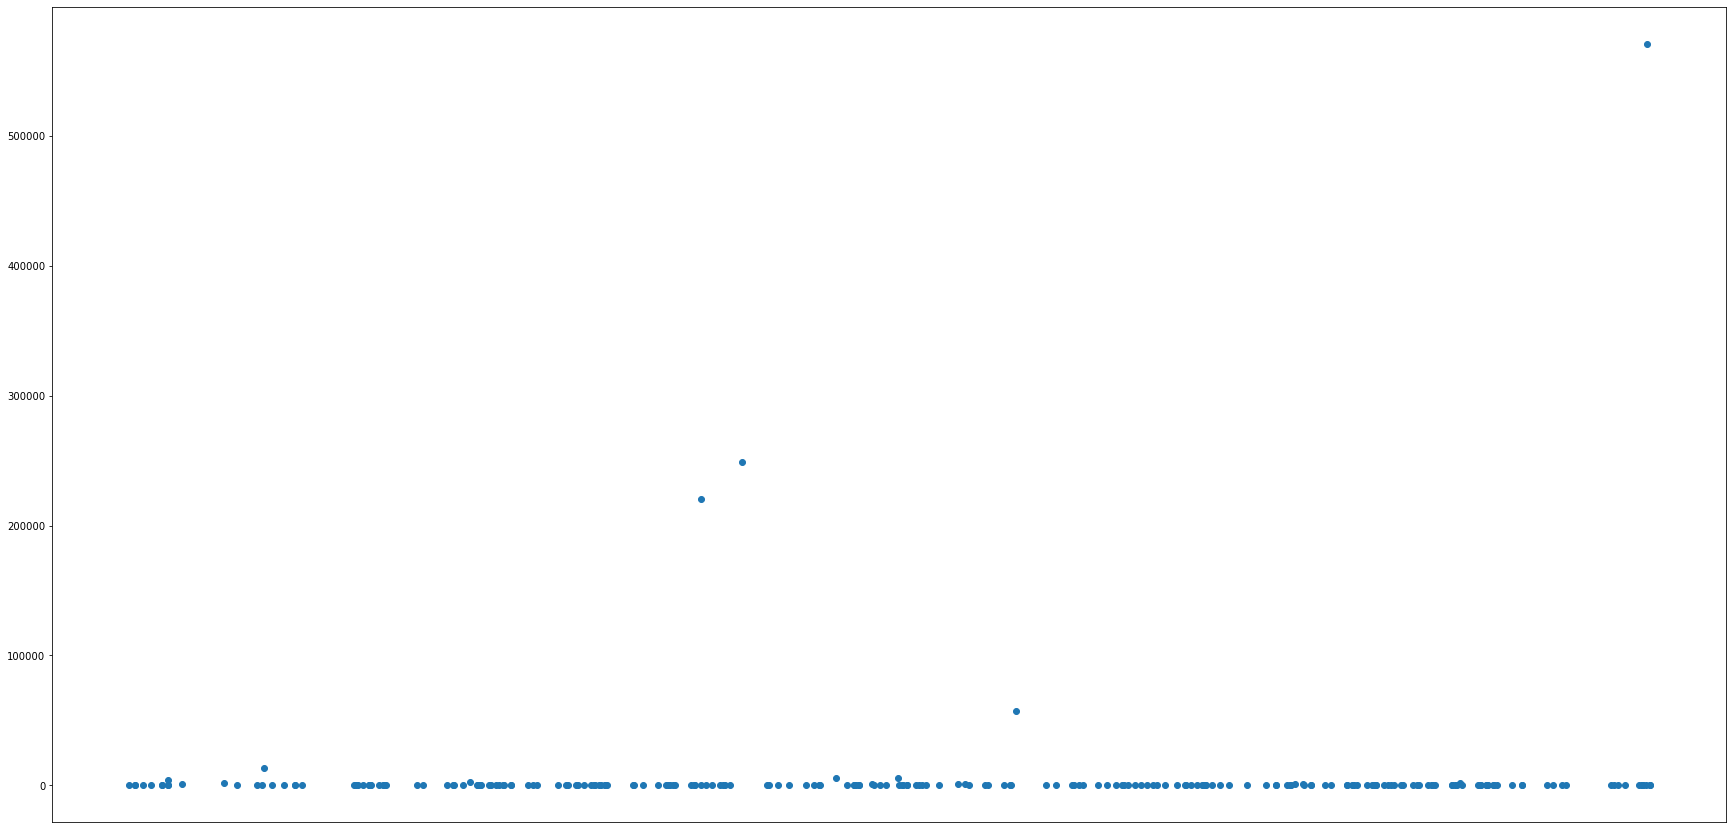

In [155]:
plt.figure(figsize=(30,15))
plt.scatter(x=np.random.random(len(raw_df)), y=raw_df['Duration (in seconds)'].astype(int))
plt.xticks([])
plt.plot()

In [156]:
raw_df.columns

Index(['IPAddress', 'Progress', 'Duration (in seconds)', 'Finished',
       'RecordedDate', 'LocationLatitude', 'LocationLongitude',
       'Luddy or not?', 'other_department', 'luddy_department',
       'SB_1_People in the Luddy School notice when I am good at something',
       'SB_2_Faculty and staff in the Luddy School value my opinions',
       'SB_3_Other students in the Luddy School take my opinions seriously',
       'SB_4_Most faculty and staff in the Luddy School are interested in me.',
       'SB_5_There is at least one instructor or other faculty or staff member in the the Luddy School I can talk to if I have a problem.',
       'SB_6_People in the Luddy School are friendly to me.',
       'SB_7_Students in the Luddy School help each other to succeed.',
       'SB_8_I am treated with as much respect as other students.',
       'SB_9_I have a good relationship with other students in the Luddy School.',
       'SB_10_I can really be myself in the Luddy School.',
       'SB_11

Cleaning out rows with least response. 

In [157]:
raw_df.columns[10:55]

Index(['SB_1_People in the Luddy School notice when I am good at something',
       'SB_2_Faculty and staff in the Luddy School value my opinions',
       'SB_3_Other students in the Luddy School take my opinions seriously',
       'SB_4_Most faculty and staff in the Luddy School are interested in me.',
       'SB_5_There is at least one instructor or other faculty or staff member in the the Luddy School I can talk to if I have a problem.',
       'SB_6_People in the Luddy School are friendly to me.',
       'SB_7_Students in the Luddy School help each other to succeed.',
       'SB_8_I am treated with as much respect as other students.',
       'SB_9_I have a good relationship with other students in the Luddy School.',
       'SB_10_I can really be myself in the Luddy School.',
       'SB_11_The faculty and staff in the Luddy School  respect me.',
       'SB_12_People in the Luddy School know I can do good work.',
       'SB_13_The instructors in the Luddy School give me compliments w

In [158]:
raw_df.iloc[:, 10:54].notna().mean(axis=1)

0      0.000000
1      0.142857
2      0.214286
3      0.000000
5      0.928571
         ...   
234    0.964286
235    1.000000
236    1.000000
237    0.964286
238    0.964286
Length: 232, dtype: float64

Retaining entries for survey with atleast 80% questions answered.

In [159]:
raw_df = raw_df[raw_df.iloc[:, 10:54].notna().mean(axis=1) > 0.8]

In [160]:
raw_df

,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,LocationLatitude,LocationLongitude,Luddy or not?,other_department,luddy_department,...,Q13_I could master the content of even the most challenging Luddy courses if I try,Q15_I can do a good job on all of my Luddy courses if I do not give up,Q16_I can do an excellent job on Luddy course-related problems and tasks assigned this semester,Q17_I can learn the content taught my Luddy courses,Q14_I can earn a good grade in the Luddy courses that I am taking this semester,Q6_For what course are you being asked to fill out this survey?,Q10_How do you describe yourself? - Selected Choice,Q11_Choose one or more races that you consider yourself to be,"Q12_1_Are you of Spanish, Hispanic, or Latino origin?",Q22
5,129.79.197.132,100,147,True,2022-08-26 12:54:46,39.1707,-86.519,"Yes, I am a student in the Luddy School",NaN,Informatics,...,Yes,Yes,Yes,Yes,Yes,DATA FLUENCY | INFO-I 123,Non-binary / third gender,Prefer not to say,No,NaN
6,129.79.197.132,100,333,True,2022-08-26 13:00:31,39.1707,-86.519,"Yes, I am a student in the Luddy School",NaN,Computer Science,...,No,Yes,No,Yes,No,DATA FLUENCY | INFO-I 123,Prefer not to say,White or Caucasian,Yes,NaN
13,129.79.197.103,100,109,True,2022-09-07 07:10:08,39.1707,-86.519,"Yes, I am a student in the Luddy School",NaN,Informatics,...,No,Yes,Yes,Yes,Yes,COMPUTER AND INFORMATION ETHICS | INFO-I 453,Female,White or Caucasian,No,NaN
14,129.79.197.105,100,103,True,2022-09-07 07:10:12,39.1707,-86.519,"Yes, I am a student in the Luddy School",NaN,Informatics,...,Yes,Yes,Yes,Yes,Yes,COMPUTER AND INFORMATION ETHICS | INFO-I 453,Male,"White or Caucasian,Asian",No,NaN
15,129.79.197.173,100,151,True,2022-09-07 07:10:39,39.1707,-86.519,"Yes, I am a student in the Luddy School",NaN,Informatics,...,No,Yes,Yes,Yes,Yes,COMPUTER AND INFORMATION ETHICS | INFO-I 453,Male,White or Caucasian,No,Q2LUD2F-4917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,129.79.197.142,100,145,True,2022-09-19 19:16:09,39.1707,-86.519,"Yes, I am a student in the Luddy School",NaN,Data Science,...,Yes,Yes,Yes,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,NaN
235,68.50.18.208,100,289,True,2022-09-19 20:10:01,39.1215,-86.5784,"Yes, I am a student in the Luddy School",NaN,Computer Science,...,No,Yes,No,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,Q2LUD2F-5693
236,73.102.55.174,100,232,True,2022-09-19 21:03:57,39.1397,-86.5141,"Yes, I am a student in the Luddy School",NaN,Data Science,...,Yes,Yes,No,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,Q2LUD2F-1877
237,66.244.80.109,100,176,True,2022-09-19 21:17:33,39.1397,-86.5141,"No, I am a student in another school/department",Math,NaN,...,Yes,Yes,Yes,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,NaN


In [161]:
raw_df['Luddy or not?'].value_counts()

Yes, I am a student in the Luddy School            181
No, I am a student in another school/department     38
Name: Luddy or not?, dtype: int64

In [162]:
raw_df['luddy_department'].notna().sum()

181

In [163]:
raw_df['other_department'].notna().sum()

38

As it can be seen here, the columns `luddy_department` and `other_department` are consistent with the `Luddy or not?` column

In [164]:
raw_df['Luddy or not?'].replace(to_replace=['Yes, I am a student in the Luddy School'], value='Yes', inplace=True)
raw_df['Luddy or not?'].replace(to_replace=['No, I am a student in another school/department'], value='No', inplace=True)

In [165]:
raw_df['Luddy or not?'].value_counts()

Yes    181
No      38
Name: Luddy or not?, dtype: int64

In [166]:
raw_df['luddy_department'].value_counts()

Informatics         70
Data Science        66
Computer Science    43
Other                2
Name: luddy_department, dtype: int64

In [167]:
raw_df['other_department'].value_counts()

Kelley School of Business                             19
College of Arts and Sciences                           4
University Division                                    4
School of Public Health                                2
Math                                                   2
O'Neill School of Public and Environmental Affairs     2
Jacobs School of Music                                 1
The Media School                                       1
International Studies                                  1
I am in Luddy                                          1
School of Education                                    1
Name: other_department, dtype: int64

In [168]:
raw_df[raw_df['other_department'] == 'I am in Luddy'].values

array([['98.59.25.222', '100', '114', 'True', '2022-09-19 07:45:08',
        '45.0702', '-93.4556', 'No', 'I am in Luddy', nan,
        'Somewhat disagree', 'Somewhat disagree', 'Somewhat disagree',
        'Somewhat disagree', 'Somewhat disagree',
        'Neither agree nor disagree', 'Neither agree nor disagree',
        'Strongly agree', 'Somewhat agree', 'Neither agree nor disagree',
        'Somewhat agree', 'Neither agree nor disagree',
        'Neither agree nor disagree', 'Somewhat agree',
        'Somewhat disagree', 'Somewhat agree', 'more than four years',
        'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes',
        'APPLIED ALGORITHMS | CSCI-B 505', 'Male', 'White or Caucasian',
        'No', nan]], dtype=object)

In [169]:
raw_df['department'] = raw_df.apply(lambda x: x['luddy_department'] if str(x['other_department'])=='nan' else x['other_department'], axis=1)
dept = raw_df.pop('department')
raw_df.insert(10, 'department', dept)

In [170]:
raw_df.drop(['other_department', 'luddy_department'], axis=1, inplace=True)

In [171]:
raw_df

,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,LocationLatitude,LocationLongitude,Luddy or not?,department,SB_1_People in the Luddy School notice when I am good at something,...,Q13_I could master the content of even the most challenging Luddy courses if I try,Q15_I can do a good job on all of my Luddy courses if I do not give up,Q16_I can do an excellent job on Luddy course-related problems and tasks assigned this semester,Q17_I can learn the content taught my Luddy courses,Q14_I can earn a good grade in the Luddy courses that I am taking this semester,Q6_For what course are you being asked to fill out this survey?,Q10_How do you describe yourself? - Selected Choice,Q11_Choose one or more races that you consider yourself to be,"Q12_1_Are you of Spanish, Hispanic, or Latino origin?",Q22
5,129.79.197.132,100,147,True,2022-08-26 12:54:46,39.1707,-86.519,Yes,Informatics,Strongly agree,...,Yes,Yes,Yes,Yes,Yes,DATA FLUENCY | INFO-I 123,Non-binary / third gender,Prefer not to say,No,NaN
6,129.79.197.132,100,333,True,2022-08-26 13:00:31,39.1707,-86.519,Yes,Computer Science,Neither agree nor disagree,...,No,Yes,No,Yes,No,DATA FLUENCY | INFO-I 123,Prefer not to say,White or Caucasian,Yes,NaN
13,129.79.197.103,100,109,True,2022-09-07 07:10:08,39.1707,-86.519,Yes,Informatics,Strongly agree,...,No,Yes,Yes,Yes,Yes,COMPUTER AND INFORMATION ETHICS | INFO-I 453,Female,White or Caucasian,No,NaN
14,129.79.197.105,100,103,True,2022-09-07 07:10:12,39.1707,-86.519,Yes,Informatics,Somewhat agree,...,Yes,Yes,Yes,Yes,Yes,COMPUTER AND INFORMATION ETHICS | INFO-I 453,Male,"White or Caucasian,Asian",No,NaN
15,129.79.197.173,100,151,True,2022-09-07 07:10:39,39.1707,-86.519,Yes,Informatics,Somewhat agree,...,No,Yes,Yes,Yes,Yes,COMPUTER AND INFORMATION ETHICS | INFO-I 453,Male,White or Caucasian,No,Q2LUD2F-4917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,129.79.197.142,100,145,True,2022-09-19 19:16:09,39.1707,-86.519,Yes,Data Science,Neither agree nor disagree,...,Yes,Yes,Yes,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,NaN
235,68.50.18.208,100,289,True,2022-09-19 20:10:01,39.1215,-86.5784,Yes,Computer Science,Somewhat agree,...,No,Yes,No,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,Q2LUD2F-5693
236,73.102.55.174,100,232,True,2022-09-19 21:03:57,39.1397,-86.5141,Yes,Data Science,Somewhat agree,...,Yes,Yes,No,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,Q2LUD2F-1877
237,66.244.80.109,100,176,True,2022-09-19 21:17:33,39.1397,-86.5141,No,Math,Neither agree nor disagree,...,Yes,Yes,Yes,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,NaN


Removing unnecessary columns (part-2)
- `IPAddress`
- `Progress`
- `Finished`

In [172]:
raw_df.drop(['IPAddress', 'Progress', 'Finished'], axis=1, inplace=True)

In [173]:
raw_df

,Duration (in seconds),RecordedDate,LocationLatitude,LocationLongitude,Luddy or not?,department,SB_1_People in the Luddy School notice when I am good at something,SB_2_Faculty and staff in the Luddy School value my opinions,SB_3_Other students in the Luddy School take my opinions seriously,SB_4_Most faculty and staff in the Luddy School are interested in me.,...,Q13_I could master the content of even the most challenging Luddy courses if I try,Q15_I can do a good job on all of my Luddy courses if I do not give up,Q16_I can do an excellent job on Luddy course-related problems and tasks assigned this semester,Q17_I can learn the content taught my Luddy courses,Q14_I can earn a good grade in the Luddy courses that I am taking this semester,Q6_For what course are you being asked to fill out this survey?,Q10_How do you describe yourself? - Selected Choice,Q11_Choose one or more races that you consider yourself to be,"Q12_1_Are you of Spanish, Hispanic, or Latino origin?",Q22
5,147,2022-08-26 12:54:46,39.1707,-86.519,Yes,Informatics,Strongly agree,Strongly agree,Strongly agree,Strongly agree,...,Yes,Yes,Yes,Yes,Yes,DATA FLUENCY | INFO-I 123,Non-binary / third gender,Prefer not to say,No,NaN
6,333,2022-08-26 13:00:31,39.1707,-86.519,Yes,Computer Science,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,...,No,Yes,No,Yes,No,DATA FLUENCY | INFO-I 123,Prefer not to say,White or Caucasian,Yes,NaN
13,109,2022-09-07 07:10:08,39.1707,-86.519,Yes,Informatics,Strongly agree,Strongly agree,Somewhat agree,Strongly agree,...,No,Yes,Yes,Yes,Yes,COMPUTER AND INFORMATION ETHICS | INFO-I 453,Female,White or Caucasian,No,NaN
14,103,2022-09-07 07:10:12,39.1707,-86.519,Yes,Informatics,Somewhat agree,Somewhat agree,Somewhat agree,Somewhat agree,...,Yes,Yes,Yes,Yes,Yes,COMPUTER AND INFORMATION ETHICS | INFO-I 453,Male,"White or Caucasian,Asian",No,NaN
15,151,2022-09-07 07:10:39,39.1707,-86.519,Yes,Informatics,Somewhat agree,Strongly agree,Somewhat agree,Strongly agree,...,No,Yes,Yes,Yes,Yes,COMPUTER AND INFORMATION ETHICS | INFO-I 453,Male,White or Caucasian,No,Q2LUD2F-4917
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,145,2022-09-19 19:16:09,39.1707,-86.519,Yes,Data Science,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,...,Yes,Yes,Yes,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,NaN
235,289,2022-09-19 20:10:01,39.1215,-86.5784,Yes,Computer Science,Somewhat agree,Strongly agree,Somewhat agree,Neither agree nor disagree,...,No,Yes,No,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,Q2LUD2F-5693
236,232,2022-09-19 21:03:57,39.1397,-86.5141,Yes,Data Science,Somewhat agree,Strongly agree,Neither agree nor disagree,Somewhat agree,...,Yes,Yes,No,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,Q2LUD2F-1877
237,176,2022-09-19 21:17:33,39.1397,-86.5141,No,Math,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,Neither agree nor disagree,...,Yes,Yes,Yes,Yes,Yes,APPLIED ALGORITHMS | CSCI-B 505,Male,Asian,No,NaN


In [175]:
raw_df['Q10_How do you describe yourself? - Selected Choice'].value_counts()

Male                         155
Female                        55
Non-binary / third gender      5
Prefer not to say              5
Name: Q10_How do you describe yourself? - Selected Choice, dtype: int64

In [177]:
raw_df['Q11_Choose one or more races that you consider yourself to be'].value_counts()

White or Caucasian                              116
Asian                                            75
Prefer not to say                                12
White or Caucasian,Asian                          5
Other                                             5
Black or African American                         5
White or Caucasian,Other                          1
White or Caucasian,Black or African American      1
Name: Q11_Choose one or more races that you consider yourself to be, dtype: int64

In [182]:
raw_df.shape

(220, 34)

In [180]:
raw_df['Q22'].value_counts()

Q2LUD2F-4917    1
Q2LUD2F-8866    1
Q2LUD2F-2584    1
Q2LUD2F-3114    1
Q2LUD2F-2007    1
               ..
Q2LUD2F-6585    1
Q2LUD2F-3069    1
Q2LUD2F-5903    1
Q2LUD2F-3563    1
Q2LUD2F-1877    1
Name: Q22, Length: 81, dtype: int64

In [181]:
sns.pairplot(raw_df)

ValueError: No variables found for grid columns.